# Base Notebook

## 0. Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from datasets import load_dataset

import warnings
warnings.filterwarnings(action='ignore')

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔 폰트 경로를 직접 설정 
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

In [11]:
from konlpy.tag import Kkma
kkma = Kkma()

## 1. Load Data

In [12]:
data_cn = load_dataset("lbox/lbox_open", "casename_classification", download_mode="force_redownload")
data_cn

Generating test2 split: 100%|██████████| 1294/1294 [00:00<00:00, 69345.94 examples/s]


DatasetDict({
    train: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 8000
    })
    validation: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1000
    })
    test2: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1294
    })
})

In [13]:
# train + test 추출
train_data = data_cn['train']
test_data = data_cn['test']

train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

train = train[['casetype', 'casename', 'facts']]
test = test[['casetype', 'casename', 'facts']]

In [14]:
train

,casetype,casename,facts
0,criminal,감염병의예방및관리에관한법률위반,피고인은 고양시 일산서구 B건물 C동에서 ‘D'을 실질적으로 운영하는 자이다.\n보...
1,criminal,감염병의예방및관리에관한법률위반,피고인은 성남시 중원구 B에서 ‘C'이라는 상호의 당구장을 운영하는 사람이다.\n중...
2,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병을 예방하기 위하여나 감염병..."
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시ㆍ도지사 또는 시장ㆍ군수ㆍ구청장은 감염병이 유행하면 감염병의 전파를..."
4,criminal,감염병의예방및관리에관한법률위반,"보건복지부장관, 시·도지사 또는 시장·군수·구청장은 감염병의 전파 방지 및 예방을 ..."
...,...,...,...
7995,criminal,횡령,범죄전력\n피고인은 2019. 12. 19. 서울중앙지방법원에서 도로교통법위반(음주...
7996,criminal,횡령,"기초사실\n피고인 B은 2018. 7.경 피고인 A에게 ‘신용도 문제가 있으니, 외..."
7997,criminal,횡령,범죄전력\n피고인 A은 2018. 4. 20. 대구지방법원 안동지원에서 사기죄 등으...
7998,criminal,횡령,피고인은 건설현장에서 목수로 일하는 사람으로 2012.경 지인의 소개로 피해자 B을...


In [15]:
test

,casetype,casename,facts
0,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병이 유행하면 감염병의 전파를..."
1,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시․도지사 또는 시장․군수․구청장은 감염병을 예방하기 위하여 감염병의..."
2,criminal,감염병의예방및관리에관한법률위반,보건복지부장관은 2020. 1. 8.경 코로나바이러스감염증-19(이하 ‘코로나-19...
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병을 예방하기 위하여 흥행, ..."
4,criminal,감염병의예방및관리에관한법률위반,"피고인들은 수원시 영통구 C, D호에서 E 유흥주점을 공동으로 운영하는 사람들이다...."
...,...,...,...
995,criminal,횡령,피고인은 2019. 5.경 청주시 흥덕구 B에 있는 피해자 C이 운영하는 'D' 주...
996,criminal,횡령,"피고인은 2019. 1. 12.경 전남 목포시 B, 2층 C직업소개소에서 2019...."
997,criminal,횡령,피고인은 2018. 4. 24.경부터 2018. 7. 9.까지 당진시 B에 있는 C...
998,criminal,횡령,범죄전력\n피고인은 2019. 9. 6. 수원지방법원 평택지원에서 횡령죄로 징역 8...


In [16]:
print(train.shape, test.shape)
print()
print(train.info(), test.info())
print()
print(train.describe(), test.describe())

(8000, 3) (1000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   casetype  8000 non-null   object
 1   casename  8000 non-null   object
 2   facts     8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   casetype  1000 non-null   object
 1   casename  1000 non-null   object
 2   facts     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None None

        casetype          casename  \
count       8000              8000   
unique         2               100   
top     criminal  감염병의예방및관리에관한법률위반   
freq        5440                80   

                                                    facts  
count                                      

## 2. EDA

### Dist

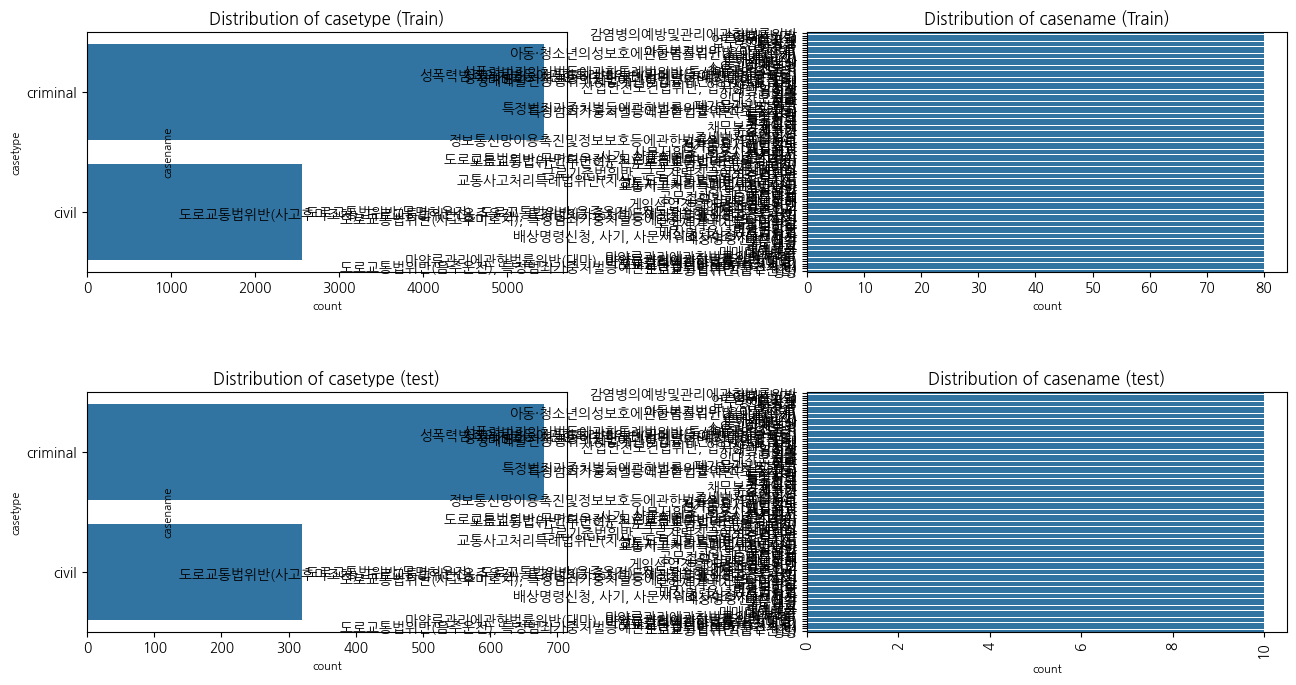

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.8, wspace=0.5, hspace=0.5)

# Train 데이터 casetype 분포
sns.countplot(y="casetype", data=train, order=train['casetype'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_xlabel('count', fontsize=8)
axes[0, 0].set_ylabel('casetype', fontsize=8)
axes[0, 0].set_title('Distribution of casetype (Train)')

# Train 데이터 casename 분포
sns.countplot(y="casename", data=train, order=train['casename'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_xlabel('count', fontsize=8)
axes[0, 1].set_ylabel('casename', fontsize=8)
axes[0, 1].set_title('Distribution of casename (Train)')

# test 데이터 casetype 분포
sns.countplot(y="casetype", data=test, order=test['casetype'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_xlabel('count', fontsize=8)
axes[1, 0].set_ylabel('casetype', fontsize=8)
axes[1, 0].set_title('Distribution of casetype (test)')

# test 데이터 casename 분포
sns.countplot(y="casename", data=test, order=test['casename'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_xlabel('count', fontsize=8)
axes[1, 1].set_ylabel('casename', fontsize=8)
axes[1, 1].set_title('Distribution of casename (test)')

plt.xticks(rotation=90)  # x축 글자 90도 회전
plt.show()


### len

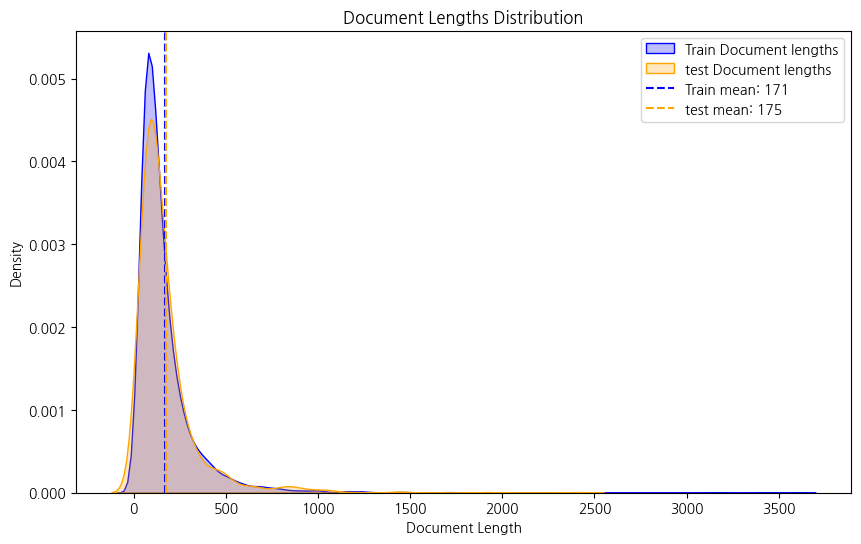

Train 데이터셋에서 가장 긴 문장: 3605개의 단어
Train 데이터셋에서 가장 짧은 문장: 4개의 단어
test 데이터셋에서 가장 긴 문장: 2408개의 단어
test 데이터셋에서 가장 짧은 문장: 24개의 단어


In [18]:
# train과 test 데이터셋의 'doc_len' 칼럼 생성
train['doc_len'] = train.facts.apply(lambda words: len(words.split()))
test['doc_len'] = test.facts.apply(lambda words: len(words.split()))

# plot
plt.figure(figsize=(10, 6))
sns.kdeplot(train['doc_len'], label='Train Document lengths', shade=True, color="blue")
sns.kdeplot(test['doc_len'], label='test Document lengths', shade=True, color="orange")
plt.axvline(x=train['doc_len'].mean(), color='blue', linestyle='--', label=f'Train mean: {train["doc_len"].mean():.0f}')
plt.axvline(x=test['doc_len'].mean(), color='orange', linestyle='--', label=f'test mean: {test["doc_len"].mean():.0f}')
plt.title("Document Lengths Distribution")
plt.xlabel("Document Length")
plt.ylabel("Density")
plt.legend()
plt.show()

# 가장 긴 문장과 가장 짧은 문장의 단어 수 출력
max_train_len = train['doc_len'].max()
min_train_len = train['doc_len'].min()
max_test_len = test['doc_len'].max()
min_test_len = test['doc_len'].min()

print(f"Train 데이터셋에서 가장 긴 문장: {max_train_len}개의 단어")
print(f"Train 데이터셋에서 가장 짧은 문장: {min_train_len}개의 단어")
print(f"test 데이터셋에서 가장 긴 문장: {max_test_len}개의 단어")
print(f"test 데이터셋에서 가장 짧은 문장: {min_test_len}개의 단어")

### Base WordCloud
토크나이저와 불용어 전처리를 모두 적용하지 않음

In [19]:
def base_wordcloud(data, text_column_name):
    # 모든 텍스트를 하나의 문자열로 결합
    text = " ".join(data[text_column_name].dropna().tolist())
    
    # 워드 클라우드 생성
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        width=800, 
        height=400, 
        background_color='white'
    ).generate(text)
    
    # 워드 클라우드 표시
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

train


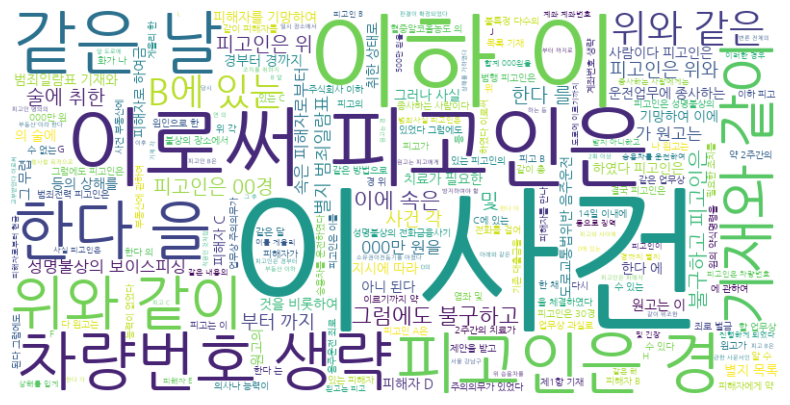

None
test


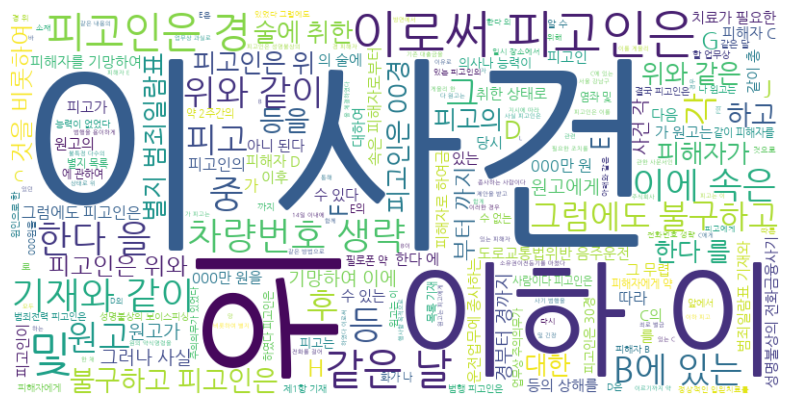

None


In [20]:
print('train')
print (base_wordcloud(train, 'facts'))

print('test')
print( base_wordcloud(test, 'facts'))

## 3. Embedding

- 데이터 전처리
- 형태소 분석기 적용

In [21]:
# 전처리 함수 정의
def preprocess(text):
    # 1. 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    
    # 2. 소문자 변환 (영어가 포함된 경우에 유효)
    text = text.lower()
    
    # 3. 토큰화
    tokens = text.split()
    
    # 4. Kkma를 사용한 형태소 분석
    words = kkma.morphs(' '.join(tokens))  # 형태소 단위로 분리
    
    # 5. 최종 문서 형태로 반환
    return ' '.join(words)

In [34]:
train['facts_pre'] = train['facts'].apply(preprocess)
test['facts_pre'] = test['facts'].apply(preprocess)

In [35]:
train

,casetype,casename,facts,doc_len,facts_pre
0,criminal,감염병의예방및관리에관한법률위반,피고인은 고양시 일산서구 B건물 C동에서 ‘D'을 실질적으로 운영하는 자이다.\n보...,98,피고 인은 고양시 일산 서구 b 건물 c 동 에서 d 을 실질적 으로 운영 하 는 ...
1,criminal,감염병의예방및관리에관한법률위반,피고인은 성남시 중원구 B에서 ‘C'이라는 상호의 당구장을 운영하는 사람이다.\n중...,46,피고인 은 성남시 중원구 b 에서 c 이 이 라는 상호 의 당구장 을 운영 하 는 ...
2,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병을 예방하기 위하여나 감염병...",73,질병 관리 청장 시도 지사 또는 시장 군수 구청장 은 감염병 을 예방 하 기 위하 ...
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시ㆍ도지사 또는 시장ㆍ군수ㆍ구청장은 감염병이 유행하면 감염병의 전파를...",75,질병 관리 청장 시 ㆍ 도지사 또는 시장ㆍ군수ㆍ구청장 은 감염병 이 유행 하 면 감...
4,criminal,감염병의예방및관리에관한법률위반,"보건복지부장관, 시·도지사 또는 시장·군수·구청장은 감염병의 전파 방지 및 예방을 ...",80,보건 복지 부 장관 시도 지사 또는 시장 군수 구청장 은 감염병 의 전파 방지 및 ...
...,...,...,...,...,...
7995,criminal,횡령,범죄전력\n피고인은 2019. 12. 19. 서울중앙지방법원에서 도로교통법위반(음주...,121,범죄 전력 피고인 은 서울 중앙 지방 법원 에서 도로 교통법 위반 음주 운전 등 으...
7996,criminal,횡령,"기초사실\n피고인 B은 2018. 7.경 피고인 A에게 ‘신용도 문제가 있으니, 외...",94,기초 사실 피고인 b 은 경 피고인 a 에게 신용도 문제 가 있 으니 외제 차량 을...
7997,criminal,횡령,범죄전력\n피고인 A은 2018. 4. 20. 대구지방법원 안동지원에서 사기죄 등으...,260,범죄 전력 피고인 a 은 대구 지방 법원 안동 지원 에서 사기죄 등 으로 징역 월 ...
7998,criminal,횡령,피고인은 건설현장에서 목수로 일하는 사람으로 2012.경 지인의 소개로 피해자 B을...,109,피고인 은 건설 현장 에서 목수 로 일하 는 사람 으로 경 지인 의 소개 로 피해자...


In [36]:
test

,casetype,casename,facts,doc_len,facts_pre
0,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병이 유행하면 감염병의 전파를...",91,질병 관리 청장 시도 지사 또는 시장 군수 구청장 은 감염병 이 유행 하 면 감염병...
1,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시․도지사 또는 시장․군수․구청장은 감염병을 예방하기 위하여 감염병의...",103,질병 관리 청장 시도 지사 또는 시장 군수 구청장 은 감염병 을 예방 하 기 위하 ...
2,criminal,감염병의예방및관리에관한법률위반,보건복지부장관은 2020. 1. 8.경 코로나바이러스감염증-19(이하 ‘코로나-19...,101,보건 복지 부 장관 은 경 코로나 바 이러 스감 염증 이하 코 로 나라 함를 제급 ...
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병을 예방하기 위하여 흥행, ...",140,질병 관리 청장 시도 지사 또는 시장 군수 구청장 은 감염병 을 예방 하 기 위하 ...
4,criminal,감염병의예방및관리에관한법률위반,"피고인들은 수원시 영통구 C, D호에서 E 유흥주점을 공동으로 운영하는 사람들이다....",87,피고인 들 은 수원시 영통 구 c d 호 에서 e 유흥 주점 을 공동 으로 운영 하...
...,...,...,...,...,...
995,criminal,횡령,피고인은 2019. 5.경 청주시 흥덕구 B에 있는 피해자 C이 운영하는 'D' 주...,73,피고인 은 경 청주시 흥덕구 b 에 있 는 피해자 c 이 운영 하 는 d 주점 에서...
996,criminal,횡령,"피고인은 2019. 1. 12.경 전남 목포시 B, 2층 C직업소개소에서 2019....",76,피고인 은 경 전 남 목포시 b 층 c 직업 소개소 에서 부 터 까 지 연안 자망 ...
997,criminal,횡령,피고인은 2018. 4. 24.경부터 2018. 7. 9.까지 당진시 B에 있는 C...,79,피고인 은 경 부터 까 지 당 진시 b 에 있 는 c 건설 현장 에서 d 를 운영 ...
998,criminal,횡령,범죄전력\n피고인은 2019. 9. 6. 수원지방법원 평택지원에서 횡령죄로 징역 8...,197,범죄 전력 피고인 은 수원 지방 법원 평 택지 원 에서 횡령죄 로 징역 월 집행 유...


In [37]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

def visualize_similarity_distance(vector1, vector2):
    # 코사인 유사도 및 유클리디안 거리 계산
    similarity_block = cosine_similarity(vector1, vector2)
    euc_distances = euclidean_distances(vector1, vector2)
    
    # 시각화
    plt.figure(figsize=(12, 5))
    
    # 코사인 유사도 히트맵
    plt.subplot(1, 2, 1)
    sns.heatmap(similarity_block, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title("Cosine Similarity")
    plt.xlabel("train")
    plt.ylabel("test")
    
    # 유클리디안 거리 히트맵
    plt.subplot(1, 2, 2)
    sns.heatmap(euc_distances, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title("Euclidean Distance")
    plt.xlabel("train")
    plt.ylabel("test")
    
    plt.show()

### 3.1. TF-IDF 
Term Frequency - Inverse Documents Frequency


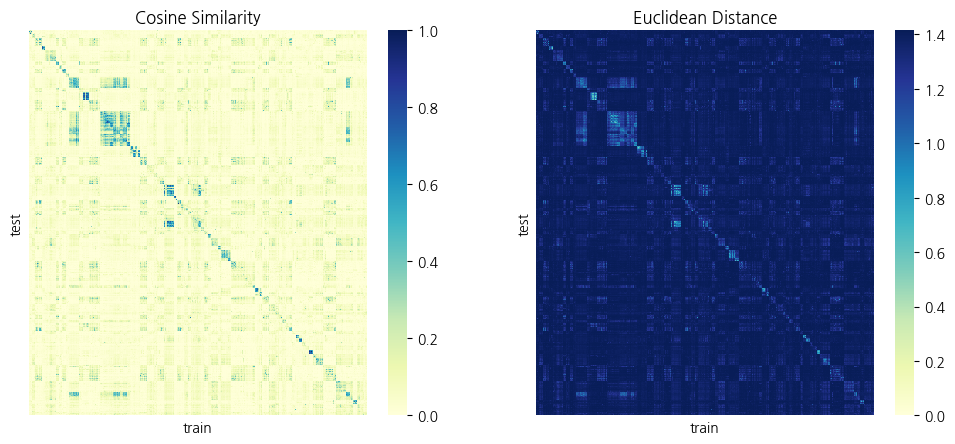

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
train_tfidf = vectorizer.fit_transform(train['facts_pre'])
test_tfidf = vectorizer.transform(test['facts_pre'])

visualize_similarity_distance(train_tfidf, test_tfidf)

### 3.2. Word2Vec


In [15]:
# 문장 벡터 평균 계산 함수
def sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

In [2]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
sentences = [comment.split() for comment in train['facts_pre']] + [sentence.split() for sentence in test['facts_pre']]
model = Word2Vec(sentences,
                 vector_size=100,
                 window=5,
                 min_count=1,
                 workers=4
                 )

# 각 데이터셋의 문장 벡터 생성
train_word2vec = np.array([sentence_vector(comment, model) for comment in train['facts_pre']])
test_word2vec = np.array([sentence_vector(sentence, model) for sentence in test['facts_pre']])
visualize_similarity_distance(train_word2vec, test_word2vec)

NameError: name 'train' is not defined

### 3.3. ELMo
Contextualized representation

In [20]:
import tensorflow as tf
import tensorflow_hub as hub

# ELMo 모델 로드
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# ELMo 임베딩 생성 함수
def elmo_embedding(sentences):
    embeddings = elmo.signatures['default'](tf.constant(sentences))["elmo"]
    return embeddings.numpy() 

# 예시 데이터
train_elmo = elmo_embedding(train['facts'])
test_elmo = elmo_embedding(test['facts'])
train_elmo

: 

### 3.4. KoBERT
Pretrained LM

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
from transformers import BertTokenizer, BertModel

model = BertModel.from_pretrained("monologg/kobert").to(device)
tokenizer = BertTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
def get_kobert_embedding(text):
    # 입력 텍스트 토크나이징 및 텐서 변환 (최대 길이 512 토큰으로 자름)
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    
    # KoBERT 모델로 임베딩 생성
    with torch.no_grad():
        outputs = model(**inputs)
    
    # [CLS] 토큰의 임베딩을 문장 임베딩으로 사용
    embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # [CLS] 토큰 벡터를 CPU로 이동하여 NumPy 배열로 변환
    return embedding

# 'facts' 컬럼에 KoBERT 임베딩 적용
train_kobert  = train['facts'].apply(get_kobert_embedding)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# ELMo 모델 로드
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# ELMo 임베딩 생성 함수
def elmo_embedding(sentences):
    embeddings = elmo.signatures['default'](tf.constant(sentences))["elmo"]
    return embeddings.numpy() 

# 예시 데이터
train_elmo = elmo_embedding(train['facts'])
test_elmo = elmo_embedding(test['facts'])
train_elmo

: 

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(
            text, 
            return_tensors='pt', 
            padding='max_length', 
            truncation=True, 
            max_length=self.max_length
        )
        return {key: value.squeeze() for key, value in inputs.items()}

In [ ]:
max_length = 128  

train_facts = list(train["facts"])
test_facts = list(test["facts"])

train_dataset = TextDataset(train_facts, tokenizer, max_length)
test_dataset = TextDataset(test_facts, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)